# Principal Component Analysis
In the following lab, which is built on the basis of the "Principal Component Analysis" lab in the book "An Introduction 
to Statistical Learning" we examine a simple dataset with only 4 features (and will only work with 3 of them). We will 
use this dataset to understand the change of base performed in PCA and how to calculate the variance captured by the different PCs.

The dataset we will use (USArrests) contains statistics in arrests per 100,000 residents for assault, murder and rape 
in the 50 US states in the year 1973.


In [17]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/Colab Notebooks/IML labs/"
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/IML labs
 Hitters.csv				'Lab 06 - BoostingBagging.ipynb'
 HittersDescription.csv			'Lab 07 - Regularization.ipynb'
'Lab 01 - Basic Sampling.ipynb'		'Lab 08 - Model Selection.ipynb'
'Lab 02 - Linear Regression.ipynb'	'Lab 09 - PCA.ipynb'
'Lab 03 - Logistic Regression.ipynb'	 SAheart.data
'Lab 04 - Decision Tree.ipynb'		 Untitled1.ipynb
'Lab 05 - Polynomial Regression.ipynb'	 USArrests.data


In [18]:
def plot(data, x_label=None, y_label=None, z_label=None, show=True):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(data[:,0], data[:, 1], data[:, 2])
    ax.set_xlabel(x_label); ax.set_ylabel(y_label);ax.set_zlabel(z_label)
    if show:
        plt.show()




In [19]:
# Initial data-exploration
import pandas as pd
df =  pd.read_csv("USArrests.data", index_col=0)
df = df.drop("UrbanPop", axis=1)
df.head()




,Murder,Assault,Rape
Alabama,13.2,236,21.2
Alaska,10.0,263,44.5
Arizona,8.1,294,31.0
Arkansas,8.8,190,19.5
California,9.0,276,40.6


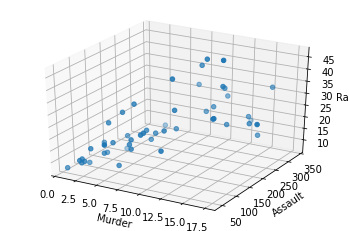

In [20]:
# Initial data-exploration
plot(df.to_numpy(), x_label=df.columns[0], y_label=df.columns[1], z_label=df.columns[2])





We begin with calculating some basic statistics of the data: the mean and standard deviation of each feature.
Then we center the data by removing from each sample's feature the mean value of the feature. To make understanding easier
let us also scale the data by dividing each feature by its standard deviation. We are left we a standardized dataset.

In [21]:
df.describe().loc[["mean","std"]]




,Murder,Assault,Rape
mean,7.78800,170.760000,21.232000
std,4.35551,83.337661,9.366385


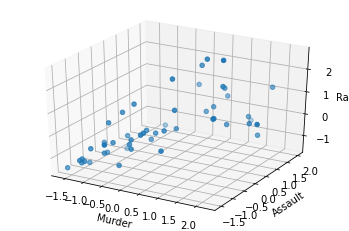

In [22]:
df = (df - df.mean()) / df.std() 
plot(df.to_numpy(), x_label=df.columns[0], y_label=df.columns[1], z_label=df.columns[2])




Over this transformed data we can apply PCA. After calculating the 3 PCs we can plot our data in the original representation,
together with the vectors of the 3 PCs.

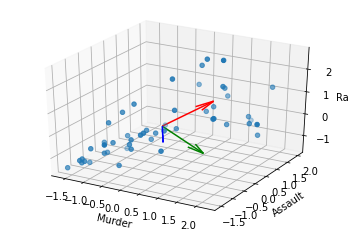

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA().fit(df)

origin = [0],[0],[0]
plot(df.to_numpy(), x_label=df.columns[0], y_label=df.columns[1], z_label=df.columns[2], show=False)
plt.quiver(*origin, *pca.components_[:,0], color="red", length=1.5)
plt.quiver(*origin, *pca.components_[:,1], color="green", length=1.5)
plt.quiver(*origin, *pca.components_[:,2], color="blue", length=1.5)
plt.show()




Next let us project the original points onto the found subspace. At this point we are still projecting on to a subspace
of dimension 3.

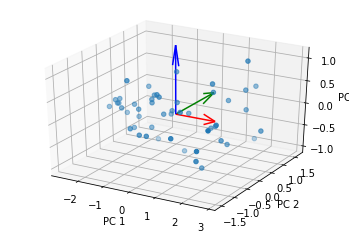

In [24]:
plot(pca.transform(df), x_label="PC 1", y_label="PC 2", z_label="PC 3", show=False)
plt.quiver(*origin, 1,0,0, color="red", length=1.5)
plt.quiver(*origin, 0,1,0, color="green", length=1.5)
plt.quiver(*origin ,0,0,1, color="blue", length=1.5)

plt.show()




And lastly, let us calculate the explained variance by each principal component and change arrows' length to be 
proportional to the explain variance 

In [25]:
# We begin with looking at the values of the explained variance as calculated for us by the sklearn function
pca.explained_variance_ratio_




array([0.7861934 , 0.15268378, 0.06112282])

In [26]:
# Next let us calculate the variance explained ourselves using the singular values. The variance explained by each
# principal component is the proportion of the eigenvalue out of the sum of eigenvalues. Therefore: 
eigenvalues = pca.singular_values_**2
eigenvalues / sum(eigenvalues)




array([0.7861934 , 0.15268378, 0.06112282])

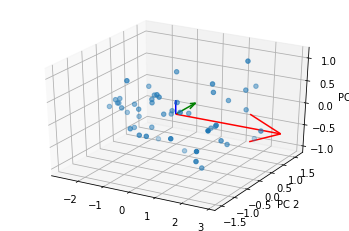

In [33]:
# Now we adjust the length of the arrows representing the PCs proportionally to the explained variance. 
# The multiplication by 5 is to make it easier to see the arrows
plot(pca.transform(df), x_label="", y_label="PC 2", z_label="PC 3", show=False)
plt.quiver(*origin, 1,0,0, color="red", length=pca.explained_variance_ratio_[0]*5)
plt.quiver(*origin, 0,1,0, color="green", length=pca.explained_variance_ratio_[1]*5)
plt.quiver(*origin ,0,0,1, color="blue", length=pca.explained_variance_ratio_[2]*5)
plt.show()

# To convince yourself that indeed these are the coordinates of the PCs in the subspace check
# what is returned from running `fit.transform(fit.components_)`. In addition think about the following:
# given an orthonormal basis v_1,...,v_k of some linear subspace what is the preresentation of v_1 in this basis?



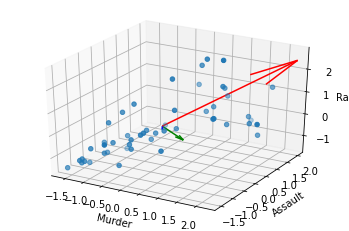

In [28]:
# And if we return to representing the points in their original coordinates:
# See how indeed the points are mainly scattered along the linear combination of the features captured by PC 1
plot(df.to_numpy(), x_label=df.columns[0], y_label=df.columns[1], z_label=df.columns[2], show=False)
plt.quiver(*origin, *pca.components_[:,0], color="red", length=pca.explained_variance_ratio_[0]*5)
plt.quiver(*origin, *pca.components_[:,1], color="green", length=pca.explained_variance_ratio_[1]*5)
plt.quiver(*origin ,*pca.components_[:,2], color="blue", length=pca.explained_variance_ratio_[2]*5)
plt.show()


[0] [0]


/usr/local/lib/python3.6/dist-packages/matplotlib/quiver.py:715: RuntimeWarning: divide by zero encountered in double_scalars
  length = a * (widthu_per_lenu / (self.scale * self.width))
/usr/local/lib/python3.6/dist-packages/matplotlib/quiver.py:715: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


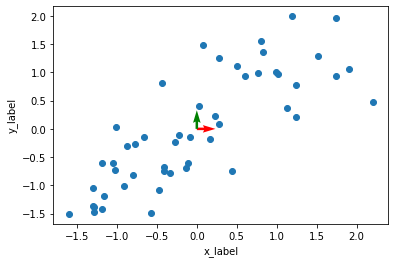

In [38]:
def project_2d(df):
    """
    Given the USArrests dataset return the coordinates for each sample after projecting onto a 2D subspace using PCA
    :param df: The dataset 
    :return: np.array with the low-dimension coordinates
    """
    pca = PCA(n_components=2).fit(df)
    pca.transform(df)
    return df.to_numpy()
    


def plot_2d(coordinates):
    """
    Given a set of 2D coordinates, representing the USArrests dataset after projecting onto the 2D subset defined by
    the PCA algorithm, plot the points together with the arrows annotating the directions of the PCs in this subspace
    :param coordinates: Low-dimension coordinates 
    """
    import matplotlib.pyplot as plt
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    ax.scatter(coordinates[:,0], coordinates[:, 1])
    ax.set_xlabel("x_label"); ax.set_ylabel("y_label");

    origin = [0],[0]
    print(*origin)
    plt.quiver(*origin, 1,0, color="red")
    plt.quiver(*origin, 0,1, color="green")
    plt.quiver(*origin, 0,0, color="blue")

    plt.show()

plot_2d(project_2d(df))